# 📦 Importing Modules
This section imports all necessary Python libraries and modules required for data cleaning, visualization, and kinetic parameter calculations.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 🧹 Data Cleaning
In this section, we load and clean the dataset to ensure consistency and accuracy. This includes:
- Removing unnecessary spaces in column names.
- Handling missing values.
- Renaming columns for better clarity.


In [2]:
def confirm_columns(df, expected_columns):
    """
    Text confirmation of column presence in the dataset.
    
    Args:
        df (pd.DataFrame): DataFrame containing the dataset.
        expected_columns (list): List of expected column names.
    
    Returns:
        None
    """
    found_columns = [col for col in expected_columns if col in df.columns]
    missing_columns = [col for col in expected_columns if col not in df.columns]

    print("\n🔍 **Column Check Report** 🔍")
    print(f"\n✔️ Found Columns ({len(found_columns)}):")
    for col in found_columns:
        print(f"   - {col}")
    
    if missing_columns:
        print(f"\n❌ Missing Columns ({len(missing_columns)}):")
        for col in missing_columns:
            print(f"   - {col}")
    else:
        print("\n🎉 All expected columns are present!")

def load_and_clean_data(file_path, expected_columns):
    """
    Load and clean the dataset for CHO cell culture kinetics.
    - Confirms the presence of expected columns.
    - Removes spaces in column names.
    - Renames columns for clarity.
    - Cleans numerical data and converts to proper data types.
    - Converts 'Clone' column to categorical.
    
    Args:
        file_path (str): Path to the CSV file.
        expected_columns (list): List of expected column names.

    Returns:
        pd.DataFrame: A cleaned DataFrame ready for analysis.
    """
    df = pd.read_csv(file_path, skiprows=1)
    df.columns = df.columns.str.strip()
    confirm_columns(df, expected_columns)
    
    df.rename(columns={
        "T": "Time (days)",
        "G": "Glucose (g/L)",
        "Gln": "Glutamine (mmol/L)",
        "Xv": "Viable Cells (cells/mL)",
        "Xd": "Dead Cells (cells/mL)",
        "L": "Lactate (g/L)",
        "Glu": "Glutamate (mmol/L)",
        "V": "Viability (%)",
        "MAb": "Antibody Concentration (mg/mL)",
        "rP": "Recombinant Protein (mg/mL)",
        "rep": "Replicate"
    }, inplace=True)
    
    for column in df.columns:
        if column == "Clone":
            continue
        if df[column].dtype == object:
            df[column] = pd.to_numeric(df[column].str.replace('%', '', regex=False), errors='coerce')
        elif df[column].dtype in [int, float]:
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    if "Clone" in df.columns:
        df["Clone"] = df["Clone"].astype("category")
    
    return df

# Define the expected columns
expected_columns = [
    "Clone", "T", "G", "Gln", "Xv", "Xd", "L", "V", "MAb", "rP", "rep"
]

# Simplify the file path definition
dataset_path = 'data/2024-05-18_Clones_B_C_Kinetics.csv'

# Load and clean the dataset
kinetics_data = load_and_clean_data(dataset_path, expected_columns)

# Display the first few rows of the cleaned data
display(kinetics_data.head())

# Explore the DataFrame and display statistics
print("\n🔍 **DataFrame Overview** 🔍")
display(kinetics_data.describe())
print("\nDataFrame Info:")
display(kinetics_data.info())


🔍 **Column Check Report** 🔍

✔️ Found Columns (9):
   - Clone
   - T
   - G
   - Gln
   - Xv
   - L
   - V
   - MAb
   - rep

❌ Missing Columns (2):
   - Xd
   - rP


,Clone,Time (days),Viable Cells (cells/mL),Viability (%),Glucose (g/L),Lactate (g/L),Glutamine (mmol/L),Glutamate (mmol/L),Antibody Concentration (mg/mL),Replicate
0,B,0,284000.0,100.0,7.419121,0.004255,5.575516,1.821962,0.0,1
1,B,0,288000.0,100.0,7.515516,0.004507,5.572859,1.811074,0.0,2
2,B,0,278000.0,100.0,7.804288,0.004333,5.487487,1.702079,0.0,3
3,C,0,302000.0,100.0,8.031550,0.004320,5.988051,1.876903,0.0,1
4,C,0,298000.0,100.0,6.737842,0.003946,5.339700,1.918827,0.0,2



🔍 **DataFrame Overview** 🔍


,Time (days),Viable Cells (cells/mL),Viability (%),Glucose (g/L),Lactate (g/L),Glutamine (mmol/L),Glutamate (mmol/L),Antibody Concentration (mg/mL),Replicate
count,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2.500000,3.939361e+06,98.881025,5.890798,1.454910,3.927452,2.110923,0.194444,2.000000
std,1.732051,5.154712e+06,1.169398,1.440266,1.296267,2.016669,0.304433,0.282230,0.828079
min,0.000000,2.780000e+05,95.580111,2.926359,0.003946,0.720759,1.415042,0.000000,1.000000
25%,1.000000,5.537500e+05,98.377193,5.183903,0.475177,1.647744,1.871917,0.000000,1.000000
50%,2.500000,1.670000e+06,99.067554,6.310566,1.040931,4.910447,2.099733,0.070000,2.000000
75%,4.000000,3.087500e+06,100.000000,6.802176,2.391654,5.554329,2.328466,0.300000,3.000000
max,5.000000,1.600000e+07,100.000000,8.031550,5.010467,6.526645,2.761856,1.000000,3.000000



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Clone                           36 non-null     category
 1   Time (days)                     36 non-null     int64   
 2   Viable Cells (cells/mL)         36 non-null     float64 
 3   Viability (%)                   36 non-null     float64 
 4   Glucose (g/L)                   36 non-null     float64 
 5   Lactate (g/L)                   36 non-null     float64 
 6   Glutamine (mmol/L)              36 non-null     float64 
 7   Glutamate (mmol/L)              36 non-null     float64 
 8   Antibody Concentration (mg/mL)  36 non-null     float64 
 9   Replicate                       36 non-null     int64   
dtypes: category(1), float64(7), int64(2)
memory usage: 2.8 KB


None

# 📊 Simple Time-Series Visualizations
Here, we generate individual time-series plots for key parameters such as:
- Viable cell density (VCD)
- Viability
- Glucose, lactate, glutamine, and glutamate concentrations
Each plot provides insights into the behavior of these parameters over time for different clones.


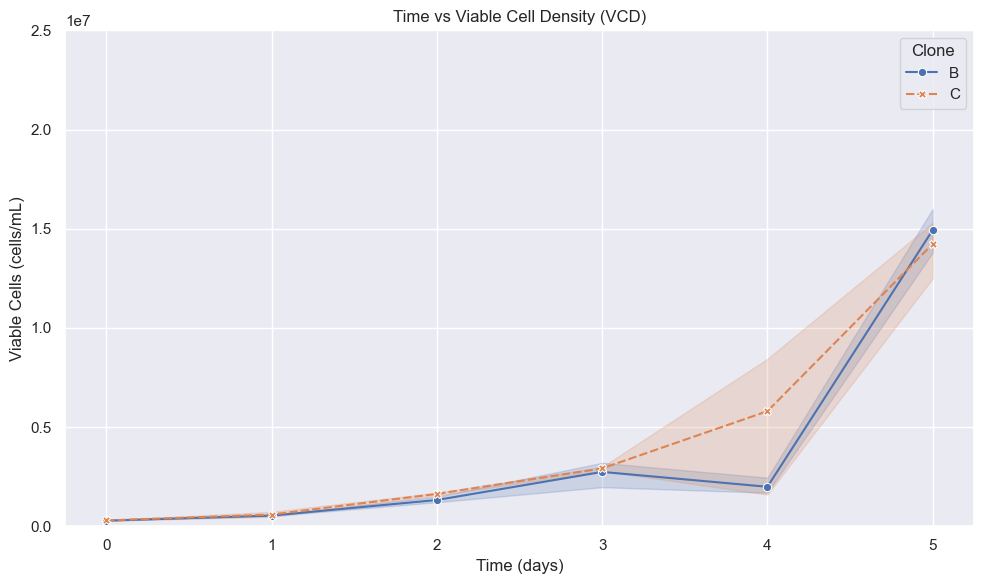

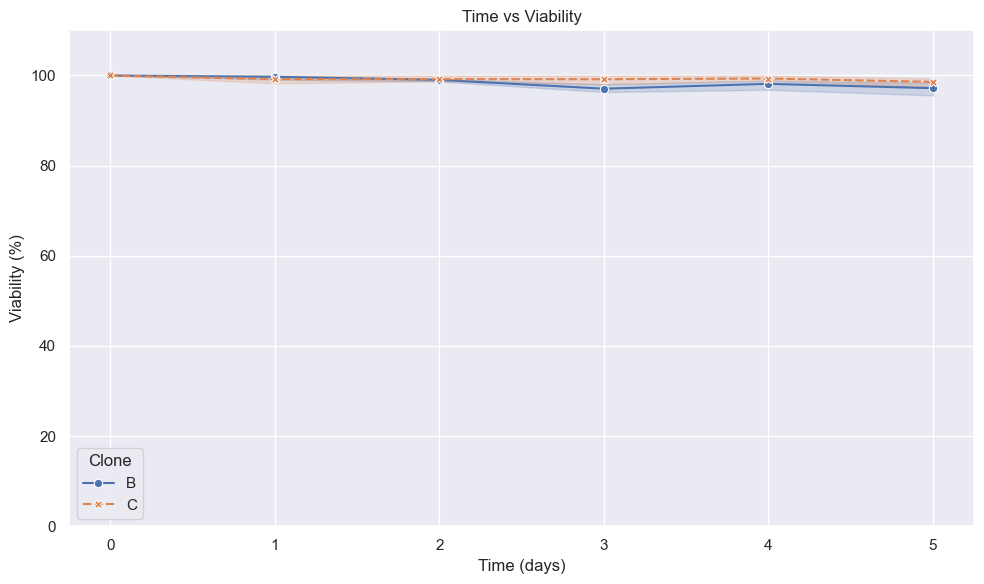

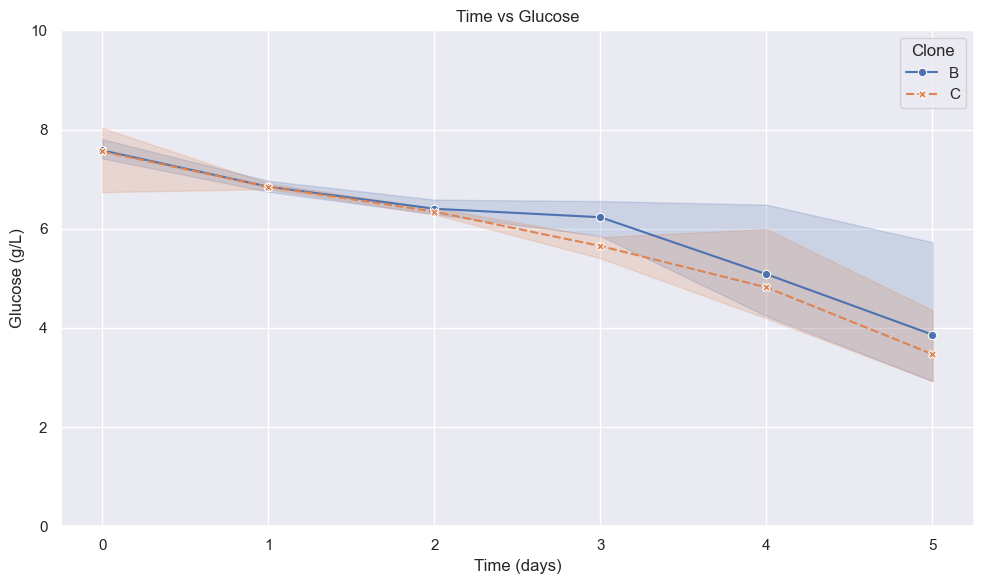

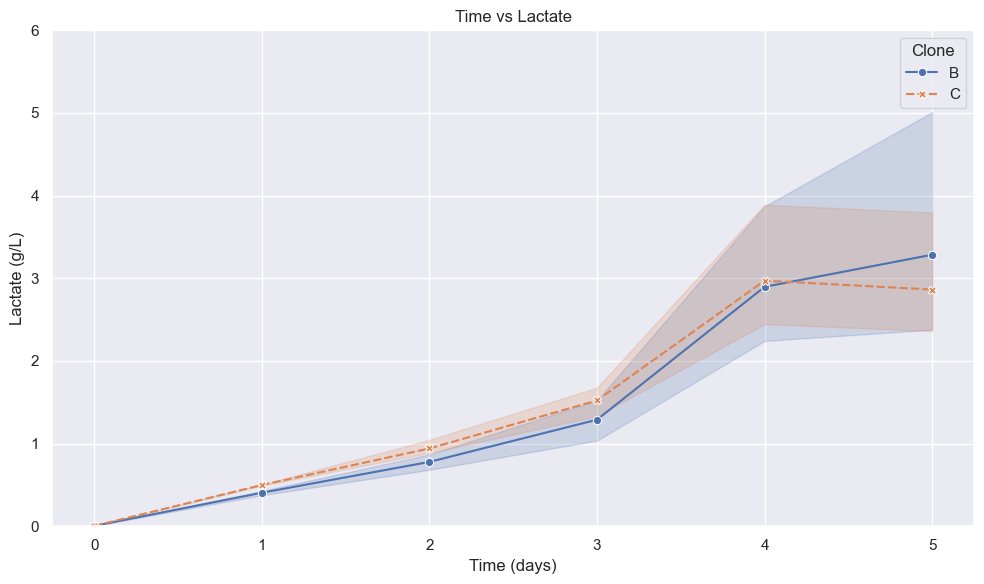

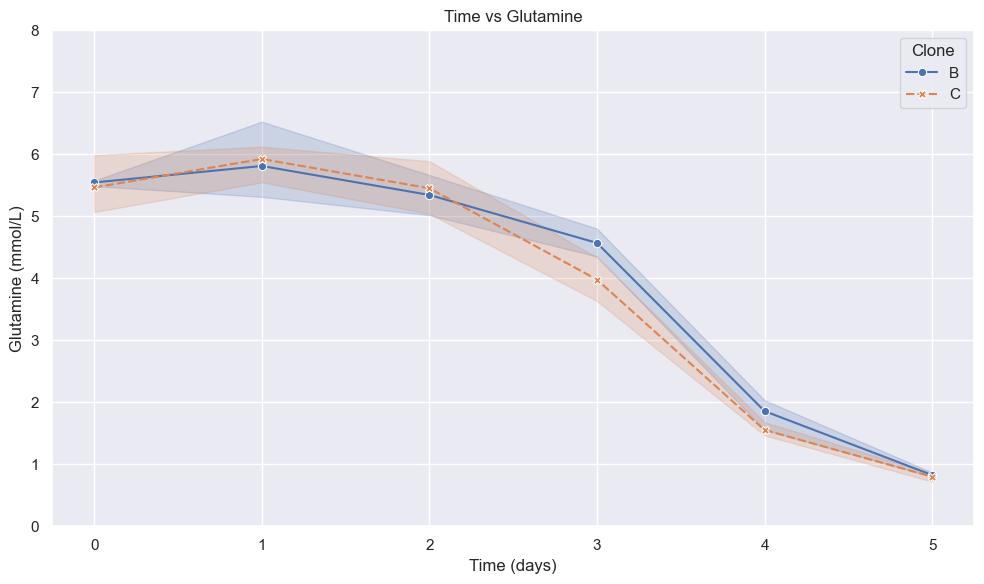

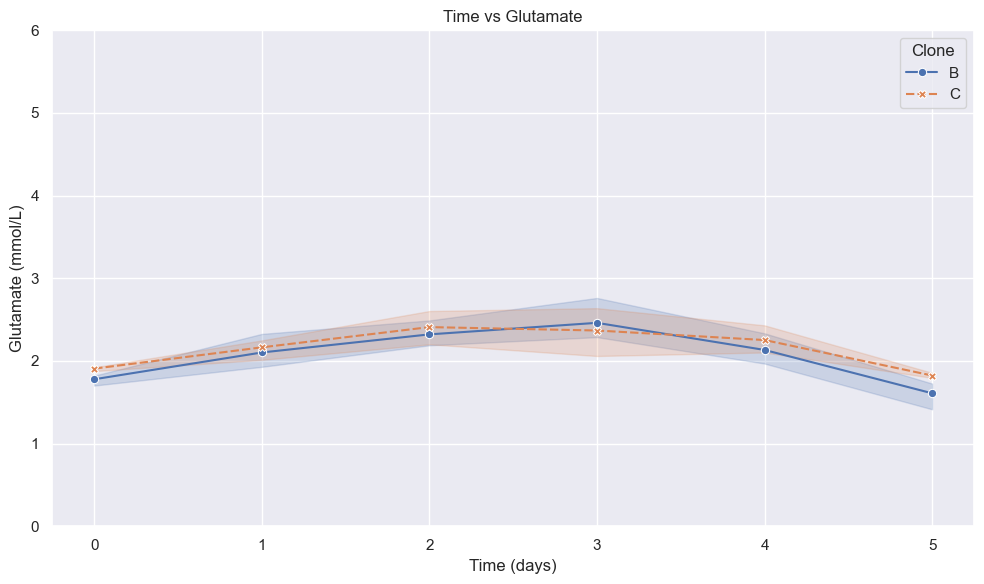

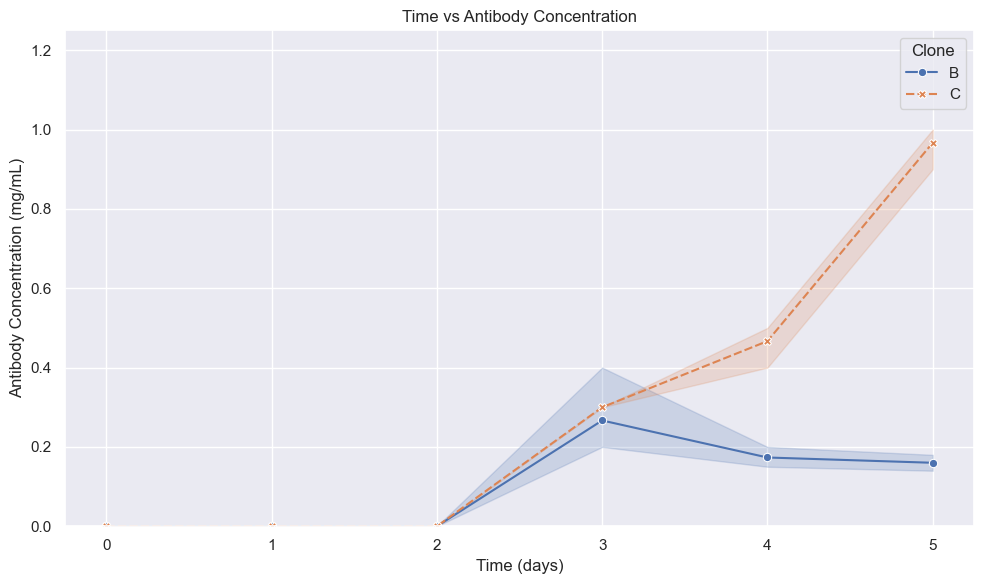

In [3]:
sns.set_theme(style="darkgrid")

# Configure the output directory for figures
output_dir = 'figures'
os.makedirs(output_dir, exist_ok=True)

def clean_filename(name):
    """
    Clean a filename by removing or replacing invalid characters.
    
    Args:
        name (str): The original filename.
    
    Returns:
        str: The cleaned filename.
    """
    return name.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')

def save_plot_if_exists(df, x, y, output_dir, **kwargs):
    """
    Save a plot if the specified columns exist in the DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data to plot.
        x (str): Column name for the x-axis.
        y (str): Column name for the y-axis.
        output_dir (str): Directory to save the plot.
        **kwargs: Additional plot parameters such as title, xlabel, ylabel, ylim, etc.

    Returns:
        None
    """
    if y in df.columns:
        plt.figure(figsize=kwargs.get('figsize', (10, 6)))
        sns.lineplot(x=x, y=y, hue="Clone", style="Clone", markers=True, data=df)
        plt.xlabel(kwargs.get('xlabel', x))
        plt.ylabel(kwargs.get('ylabel', y))
        plt.title(kwargs.get('title', f"{y} vs {x}"))
        plt.ylim(kwargs.get('ylim', None))
        plt.grid(True)
        plt.legend(title="Clone")
        plt.tight_layout()
        cleaned_filename = clean_filename(f"{y}_vs_{x}.png")
        output_path = os.path.join(output_dir, cleaned_filename)
        plt.savefig(output_path, format="png", dpi=300)
        plt.show()

# Generate plots for available columns
save_plot_if_exists(kinetics_data, "Time (days)", "Viable Cells (cells/mL)", output_dir,
                    ylabel="Viable Cells (cells/mL)", title="Time vs Viable Cell Density (VCD)", ylim=(0, 25000000))

save_plot_if_exists(kinetics_data, "Time (days)", "Viability (%)", output_dir,
                    ylabel="Viability (%)", title="Time vs Viability", ylim=(0, 110))

save_plot_if_exists(kinetics_data, "Time (days)", "Glucose (g/L)", output_dir,
                    ylabel="Glucose (g/L)", title="Time vs Glucose", ylim=(0, 10))

save_plot_if_exists(kinetics_data, "Time (days)", "Lactate (g/L)", output_dir,
                    ylabel="Lactate (g/L)", title="Time vs Lactate", ylim=(0, 6))

save_plot_if_exists(kinetics_data, "Time (days)", "Glutamine (mmol/L)", output_dir,
                    ylabel="Glutamine (mmol/L)", title="Time vs Glutamine", ylim=(0, 8))

save_plot_if_exists(kinetics_data, "Time (days)", "Glutamate (mmol/L)", output_dir,
                    ylabel="Glutamate (mmol/L)", title="Time vs Glutamate", ylim=(0, 6))

save_plot_if_exists(kinetics_data, "Time (days)", "Antibody Concentration (mg/mL)", output_dir,
                    ylabel="Antibody Concentration (mg/mL)", title="Time vs Antibody Concentration", ylim=(0, 1.25))


# 🔗 Combined Time-Series Visualizations
This section focuses on plots that combine multiple parameters with similar units into a single graph for comparison, such as:
- Glucose and lactate concentrations
- Glutamine and glutamate concentrations


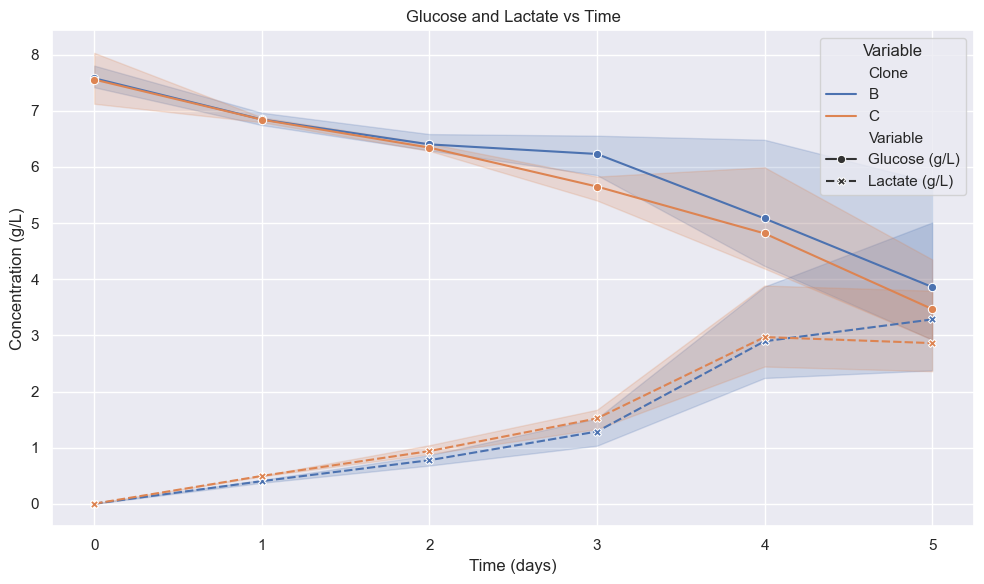

In [4]:
# Filter the DataFrame for Glucose and Lactate
glucose_lactate_data = kinetics_data[["Time (days)", "Clone", "Glucose (g/L)", "Lactate (g/L)"]]

# Melt the DataFrame to reshape it for Seaborn
melted_glucose_lactate = pd.melt(glucose_lactate_data,
                                 id_vars=["Time (days)", "Clone"],
                                 value_vars=["Glucose (g/L)", "Lactate (g/L)"],
                                 var_name="Variable",
                                 value_name="Concentration")

# Plot Glucose and Lactate vs Time
plt.figure(figsize=(10, 6))
sns.lineplot(x="Time (days)", y="Concentration", hue="Clone", style="Variable", markers=True,
             data=melted_glucose_lactate)

# Add labels, title, and legend
plt.xlabel("Time (days)")
plt.ylabel("Concentration (g/L)")
plt.title("Glucose and Lactate vs Time")
plt.legend(title="Variable")
plt.grid(True)
plt.tight_layout()

# Save the plot
glucose_lactate_filename = os.path.join(output_dir, "Glucose_and_Lactate_vs_Time.png")
plt.savefig(glucose_lactate_filename, format="png", dpi=300)
plt.show()

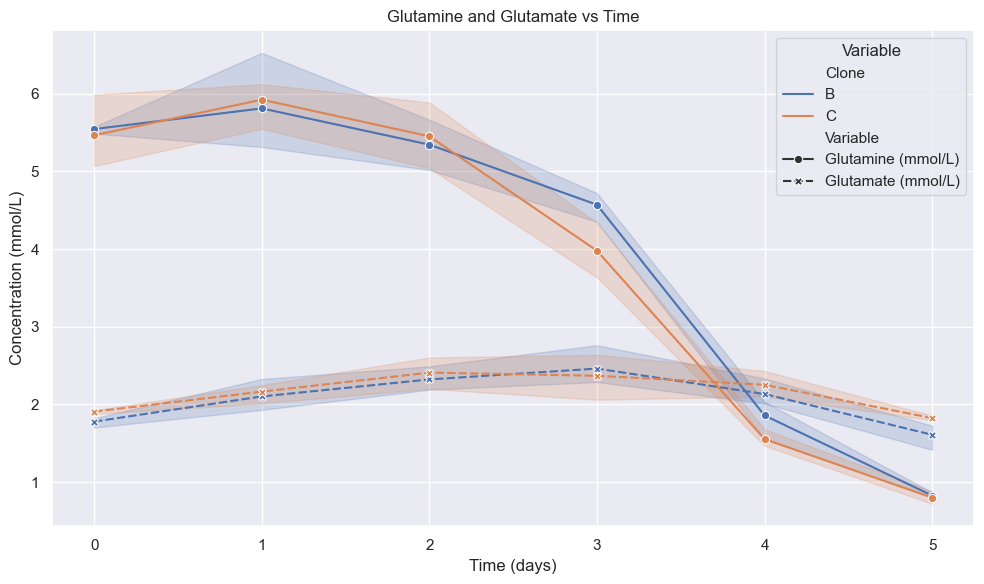

In [5]:
# Filter the DataFrame for Glutamine and Glutamate
glutamine_glutamate_data = kinetics_data[["Time (days)", "Clone", "Glutamine (mmol/L)", "Glutamate (mmol/L)"]]

# Melt the DataFrame to reshape it for Seaborn
melted_glutamine_glutamate = pd.melt(glutamine_glutamate_data,
                                     id_vars=["Time (days)", "Clone"],
                                     value_vars=["Glutamine (mmol/L)", "Glutamate (mmol/L)"],
                                     var_name="Variable",
                                     value_name="Concentration")

# Plot Glutamine and Glutamate vs Time
plt.figure(figsize=(10, 6))
sns.lineplot(x="Time (days)", y="Concentration", hue="Clone", style="Variable", markers=True,
             data=melted_glutamine_glutamate)

# Add labels, title, and legend
plt.xlabel("Time (days)")
plt.ylabel("Concentration (mmol/L)")
plt.title("Glutamine and Glutamate vs Time")
plt.legend(title="Variable")
plt.grid(True)
plt.tight_layout()

# Save the plot
glutamine_glutamate_filename = os.path.join(output_dir, "Glutamine_and_Glutamate_vs_Time.png")
plt.savefig(glutamine_glutamate_filename, format="png", dpi=300)
plt.show()

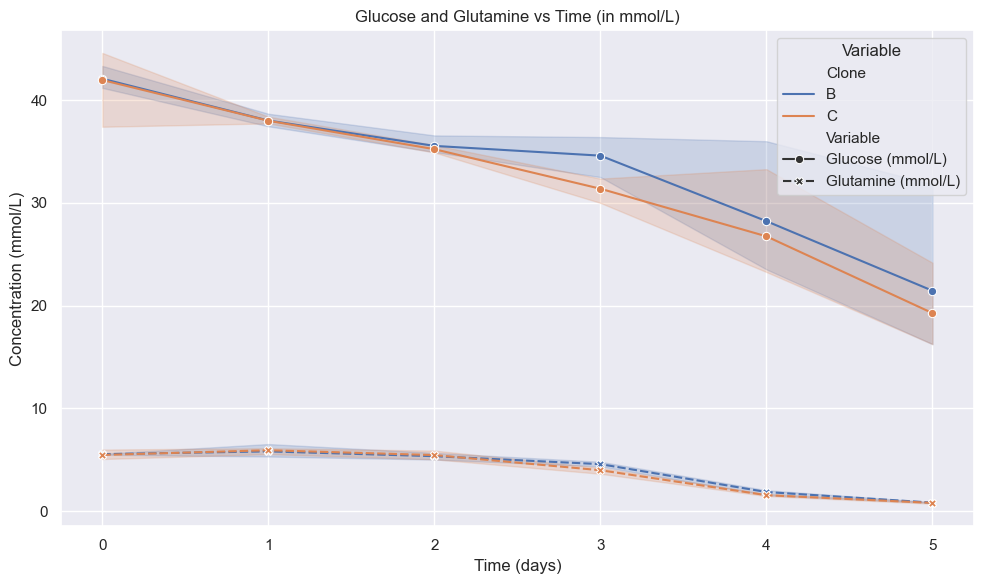

In [6]:
# Convert Glucose from g/L to mmol/L
kinetics_data["Glucose (mmol/L)"] = kinetics_data["Glucose (g/L)"] * 1000 / 180.16

# Filter the DataFrame for Glucose (converted) and Glutamine
glucose_glutamine_data = kinetics_data[["Time (days)", "Clone", "Glucose (mmol/L)", "Glutamine (mmol/L)"]]

# Melt the DataFrame to reshape it for Seaborn
melted_glucose_glutamine = pd.melt(glucose_glutamine_data,
                                   id_vars=["Time (days)", "Clone"],
                                   value_vars=["Glucose (mmol/L)", "Glutamine (mmol/L)"],
                                   var_name="Variable",
                                   value_name="Concentration")

# Plot Glucose and Glutamine vs Time
plt.figure(figsize=(10, 6))
sns.lineplot(x="Time (days)", y="Concentration", hue="Clone", style="Variable", markers=True,
             data=melted_glucose_glutamine)

# Add labels, title, and legend
plt.xlabel("Time (days)")
plt.ylabel("Concentration (mmol/L)")
plt.title("Glucose and Glutamine vs Time (in mmol/L)")
plt.legend(title="Variable")
plt.grid(True)
plt.tight_layout()

# Save the plot
glucose_glutamine_filename = os.path.join(output_dir, "Glucose_and_Glutamine_vs_Time.png")
plt.savefig(glucose_glutamine_filename, format="png", dpi=300)
plt.show()

# 📈 Kinetic and Stoichiometric Parameter Calculations
Here, we calculate key kinetic and stoichiometric parameters for each clone, including:
- Specific growth rate (\( \mu \))
- Biomass yields (\( Y \))
- Specific consumption rates (\( q \))
The exponential growth phase is defined by the user to perform these calculations.


In [7]:
# Define the time range for the exponential phase (user-defined)
time_start = 0  # Start time in days
time_end = 4    # End time in days

print(f"Exponential phase analysis: Using data from {time_start} to {time_end} days.")

# List of clones
clones = kinetics_data["Clone"].unique()

# List to store results for each clone
clone_results = []

# Loop through each clone
for clone in clones:
    # Filter the DataFrame for the specific clone and group by time
    df_clone = kinetics_data[kinetics_data["Clone"] == clone].groupby("Time (days)").mean(numeric_only=True).reset_index()

    # Convert Glucose (g/L) to mmol/L
    df_clone["Glucose (mmol/L)"] = df_clone["Glucose (g/L)"] * 1000 / 180.16

    # Convert Viable Cell Density (cells/mL) to cells/L
    df_clone["Viable Cells (cells/L)"] = df_clone["Viable Cells (cells/mL)"] * 1e3

    # Calculate ln(Viable Cells)
    df_clone["ln(Viable Cells)"] = np.log(df_clone["Viable Cells (cells/L)"])

    # Filter data for the exponential phase based on user-defined time range
    df_subset = df_clone[(df_clone["Time (days)"] >= time_start) & (df_clone["Time (days)"] <= time_end)]

    # Skip clone if not enough data points are available in the selected range
    if len(df_subset) < 2:
        print(f"Insufficient data for clone {clone} in the range {time_start}-{time_end} days. Skipping...")
        continue

    # Linear regression to calculate growth rate (mu)
    slope_mu, intercept_mu, r_value_mu, p_value_mu, std_err_mu = linregress(
        df_subset["Time (days)"], df_subset["ln(Viable Cells)"]
    )
    mu = slope_mu  # The slope is the specific growth rate (mu)

    # Calculate average intermediate deltas for ΔX
    delta_X_values = df_subset["Viable Cells (cells/L)"].diff().dropna()
    delta_X = delta_X_values.mean() * len(delta_X_values)

    # Calculate total changes in Glucose and Glutamine (using initial and final values)
    delta_G = df_subset["Glucose (mmol/L)"].iloc[-1] - df_subset["Glucose (mmol/L)"].iloc[0]  # ΔG
    delta_Gln = df_subset["Glutamine (mmol/L)"].iloc[-1] - df_subset["Glutamine (mmol/L)"].iloc[0]  # ΔGln

    # Calculate biomass yields (Yx/s) for Glucose and Glutamine
    Yx_G = delta_X / abs(delta_G)  # Biomass yield/glucose
    Yx_Gln = delta_X / abs(delta_Gln)  # Biomass yield/glutamine

    # Calculate time interval and average cell density
    delta_t = df_subset["Time (days)"].iloc[-1] - df_subset["Time (days)"].iloc[0]
    X_avg = (df_subset["Viable Cells (cells/L)"].iloc[0] + df_subset["Viable Cells (cells/L)"].iloc[-1]) / 2

    # Calculate specific consumption rates for Glucose and Glutamine
    avg_delta_G_dt = delta_G / delta_t  # Average change in glucose per day
    avg_delta_Gln_dt = delta_Gln / delta_t  # Average change in glutamine per day
    q_G = abs(avg_delta_G_dt / X_avg)  # Specific glucose consumption (absolute value)
    q_Gln = abs(avg_delta_Gln_dt / X_avg)  # Specific glutamine consumption (absolute value)

    # Append results as a dictionary to the list
    clone_results.append({
        "Clone": clone,
        "Specific Growth Rate (mu, d^-1)": mu,
        "Total Delta Glucose (mmol/L)": delta_G,
        "Total Delta Glutamine (mmol/L)": delta_Gln,
        "Average Delta X (cells/L)": delta_X,
        "Biomass Yield (Yx/G, cells/L/mmol)": Yx_G,
        "Biomass Yield (Yx/Gln, cells/L/mmol)": Yx_Gln,
        "Average Delta_G/Delta_t (mmol/L/day)": avg_delta_G_dt,
        "Average Delta_Gln/Delta_t (mmol/L/day)": avg_delta_Gln_dt,
        "Average Cell Density (X, cells/L)": X_avg,
        "Specific q_G (mmol/cell·day)": q_G,
        "Specific q_Gln (mmol/cell·day)": q_Gln,
    })

# Create a consolidated DataFrame from the results list
df_results = pd.DataFrame(clone_results)

# Display the consolidated DataFrame
display(df_results)

Exponential phase analysis: Using data from 0 to 4 days.


,Clone,"Specific Growth Rate (mu, d^-1)",Total Delta Glucose (mmol/L),Total Delta Glutamine (mmol/L),Average Delta X (cells/L),"Biomass Yield (Yx/G, cells/L/mmol)","Biomass Yield (Yx/Gln, cells/L/mmol)",Average Delta_G/Delta_t (mmol/L/day),Average Delta_Gln/Delta_t (mmol/L/day),"Average Cell Density (X, cells/L)",Specific q_G (mmol/cell·day),Specific q_Gln (mmol/cell·day)
0,B,0.552577,-13.859228,-3.687862,1.706667e+09,1.231430e+08,4.627795e+08,-3.464807,-0.921965,1.136667e+09,3.048217e-09,8.111133e-10
1,C,0.756214,-15.210249,-3.912882,5.506000e+09,3.619928e+08,1.407147e+09,-3.802562,-0.978220,3.047000e+09,1.247969e-09,3.210438e-10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


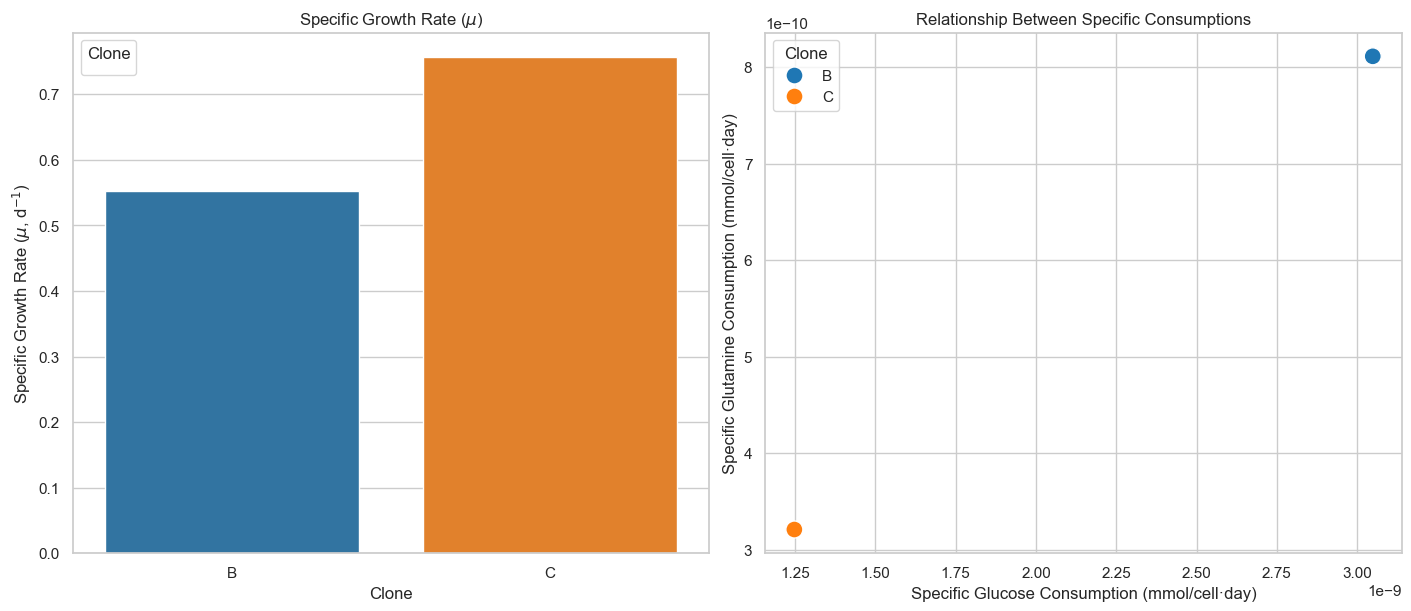

In [8]:
# Configure general style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots and automatically adjust the layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# First Plot: Bar plot for specific growth rate (mu)
sns.barplot(
    data=df_results, 
    x="Clone", 
    y="Specific Growth Rate (mu, d^-1)",
    hue="Clone",
    palette="tab10", 
    ax=axes[0]
)
axes[0].set_xlabel("Clone")
axes[0].set_ylabel(r"Specific Growth Rate ($\mu$, d$^{-1}$)")
axes[0].set_title(r"Specific Growth Rate ($\mu$)")
axes[0].legend(title="Clone", loc="best")

# Second Plot: Scatter plot for specific consumptions
sns.scatterplot(
    data=df_results,
    x="Specific q_G (mmol/cell·day)",
    y="Specific q_Gln (mmol/cell·day)",
    hue="Clone",
    palette="tab10",
    s=150,  # Size of the points
    ax=axes[1]
)
axes[1].set_xlabel("Specific Glucose Consumption (mmol/cell·day)")
axes[1].set_ylabel("Specific Glutamine Consumption (mmol/cell·day)")
axes[1].set_title("Relationship Between Specific Consumptions")
axes[1].legend(title="Clone", loc="best")


# Save the figure
kinetic_parameters_filename = os.path.join(output_dir, "kinetic_parameters_comparison.png")
plt.savefig(kinetic_parameters_filename, format="png", dpi=300)
plt.show()
